In [12]:
import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/dksdudgn00/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/dksdudgn00/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [13]:
wordnet.synsets('car') #[Synset('car.n.01'),
                       #Synset('car.n.02'),
                       # Synset('car.n.03'),
                       # Synset('car.n.04'),
                       # Synset('cable_car.n.01')]

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [14]:
car = wordnet.synset('car.n.01') 
car.definition() #'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [15]:
car.lemma_names() #['car', 'auto', 'automobile', 'machine', 'motorcar']

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [16]:
car.hypernym_paths() # 추상적인 내용부터 내려가며 점점 구체화된 단어의 의미로 나타남

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('artifact.n.01'),
  Synset('instrumentality.n.03'),
  Synset('container.n.01'),
  Synset('wheeled_vehicle.n.01'),
  Synset('self-propelled_vehicle.n.01'),
  Synset('motor_vehicle.n.01'),
  Synset('car.n.01')],
 [Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('artifact.n.01'),
  Synset('instrumentality.n.03'),
  Synset('conveyance.n.03'),
  Synset('vehicle.n.01'),
  Synset('wheeled_vehicle.n.01'),
  Synset('self-propelled_vehicle.n.01'),
  Synset('motor_vehicle.n.01'),
  Synset('car.n.01')]]

In [20]:
# 단어간 의미 유사도
car = wordnet.synset('car.n.01') # 자동차
novel = wordnet.synset('novel.n.01') # 소설 
dog = wordnet.synset('dog.n.01') # 개
motorcycle = wordnet.synset('motorcycle.n.01')
print(car.path_similarity(novel)) # 0.0555555555555
print(car.path_similarity(dog)) # 0.0769230769
car.path_similarity(motorcycle) # 0.33333333333333333
# 1에 가까울 수록 유사도 높다.


0.05555555555555555
0.07692307692307693


0.3333333333333333

In [2]:
text = 'You say goodbye and I say hello.'
text = text.lower()
text = text.replace('.', ' .')
text

'you say goodbye and i say hello .'

In [3]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [4]:
word_to_id = {}
id_to_word = {}
for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word
print(id_to_word)
word_to_id

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [5]:
print(id_to_word[1])
word_to_id['hello']

say


5

In [7]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [9]:
# corpus proprecessing을 위한 함수 구현
def preprocess(text):
    text = text.lower() # 모두 소문자로 변환
    text = text.replace('.', ' .') # 마침표로 구분하되, 마지막 문장을 고려하여 공백+'.'을 추가, 이는 정규표현식을 이용하여 더 간단하게 가능
    words = text.split(' ') # 분리한 문장을 단어로 리스트화 한다.
    word_to_id = {} # key값으로 단어를, value로 순서(숫자)를 부여
    id_to_word = {} # word_to_id와 반대
    for word in words:
        if word not in word_to_id: # 0부터 시작
            new_id = len(word_to_id)
            word_to_id[word] = new_id # 첫 번째 단어부터 0,1,2... 순서 부여
            id_to_word[new_id] = word # word_to_id와 반대로 0,1,2...에 단어들을 순서대로 value로 넣는다
            
    corpus = np.array([word_to_id[w] for w in words]) # 단어 목록을 넘파이 배열로 변환
    return corpus, word_to_id, id_to_word
text = "Your say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
print(f"corpus: {corpus}") # corpus: [0 1 2 3 4 1 5 6]
print(f"word_to_id: {word_to_id}") # word_to_id: {'your': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
print(f"id_to_word: {id_to_word}") # id_to_word: {0: 'your', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

corpus: [0 1 2 3 4 1 5 6]
word_to_id: {'your': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
id_to_word: {0: 'your', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [17]:
# 동시발생 행렬 자동화 함수
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus) 
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32) # matrix 초기화
    
    for idx, word_id in enumerate(corpus): # enumerate 내장함수를 이용해 index와 value를 나눈다.
        for i in range(1, window_size+1):  # 모든 단어 각각에 대해 윈도우에 포함된 주변 단어 세기 반복
            left_idx = idx - i
            right_idx = idx + i
            
            if left_idx >= 0: # corpus의 왼쪽 끝 경계를 벗어나지 않게 처리
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
                
            if right_idx < corpus_size: # corpus의 오른쪽 끝 경계를 벗어나지 않게 처리
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
                
    return co_matrix

In [18]:
def cos_similarity(x, y, eps=1e-8):
    nx = x / np.sqrt(np.sum(x**2)+eps) # x를 정규화
    ny = y / np.sqrt(np.sum(y**2)+eps) # y를 정규화
    return np.dot(nx,ny) # 벡터의 내적을 반환
    # 분모에 0이 들어오면 divide by zero error가 발생함으로 예외처리

In [19]:
import sys
sys.path.append('..')
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']] # you 단어의 벡터
c1 = C[word_to_id['i']] # i 단어의 벡터
cos_similarity(c0, c1)

0.7071067758832467

In [23]:
# 검색어와 비슷한 단어를 유사도 순으로 출력하는 함수 구현
# query: 검색어, word_to_id: 단어에서 단어id, id_to_word: id에서 단어, word_matrix: 단어 벡터를 모아놓은 행렬, top: 상위 몇개까지 출력
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    # 검색어를 꺼낸다
    if query not in word_to_id:
        print(f'{query}(을)를 찾을 수 없습니다.')
        return
    
    print(f'\n{[query]}')
    query_id = word_to_id[query] # 해당 단어에 해당되는 index를 저장
    query_vec = word_matrix[query_id] # 해당 index에 해당하는 단어를 행렬에서 찾아 저장

    # cosine similarty 계산
    vocab_size = len(id_to_word) # 단어 사이즈는 단어의 개수만큼
    similarity = np.zeros(vocab_size) # 행렬 초기화
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec) # 유사도를 계산하여 저장한다
        
    # 내림차순으로 출력해준다.
    count = 0
    for i in (-1 * similarity).argsort(): # 내림차순 정렬을 위한 -1을 곱하기
        if id_to_word[i] == query: 
            continue
        print(f'{id_to_word[i]},{similarity[i]}')
        
        count += 1
        if count >= top:
            return

In [24]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
most_similar('you', word_to_id, id_to_word, C, top=5)


['you']
goodbye,0.7071067758832467
i,0.7071067758832467
hello,0.7071067758832467
say,0.0
and,0.0


In [25]:
def ppmi(C, verbose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i,j] = max(0, pmi)
            
            if verbose:
                cnt += 1
                if cnt % (total//100 + 1)  == 0:
                    print(f"(100*cnt/total) 완료")
    return M

In [26]:
text = 'You say goodbye and I say hello. '
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)
print('동시발생 행렬')
print(C)
# 동시발생 행렬
# [[0 1 0 0 0 0 0 0]
#  [1 0 1 0 1 1 0 0]
#  [0 1 0 1 0 0 0 0]
#  [0 0 1 0 1 0 0 0]
#  [0 1 0 1 0 0 0 0]
#  [0 1 0 0 0 0 1 0]
#  [0 0 0 0 0 1 0 1]
#  [0 0 0 0 0 0 1 0]]
print('-'*50)
print('PPMI')
print(W)
# PPMI
# [[0. 2. 0. 0. 0. 0. 0. 0.]
#  [2. 0. 1. 0. 1. 1. 0. 0.]
#  [0. 1. 0. 2. 0. 0. 0. 0.]
#  [0. 0. 2. 0. 2. 0. 0. 0.]
#  [0. 1. 0. 2. 0. 0. 0. 0.]
#  [0. 1. 0. 0. 0. 0. 2. 0.]
#  [0. 0. 0. 0. 0. 2. 0. 3.]
#  [0. 0. 0. 0. 0. 0. 3. 0.]]

동시발생 행렬
[[0 1 0 0 0 0 0 0]
 [1 0 1 0 1 1 0 0]
 [0 1 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 0]
 [0 1 0 1 0 0 0 0]
 [0 1 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0. 2. 0. 0. 0. 0. 0. 0.]
 [2. 0. 1. 0. 1. 1. 0. 0.]
 [0. 1. 0. 2. 0. 0. 0. 0.]
 [0. 0. 2. 0. 2. 0. 0. 0.]
 [0. 1. 0. 2. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 2. 0. 3.]
 [0. 0. 0. 0. 0. 0. 3. 0.]]


In [27]:
# SVD를 코드로 구현
import matplotlib.pyplot as plt
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

U, S, V = np.linalg.svd(W) # numpy에서 제공하는 linalg 모듈에서 SVD 메서드를 실행할 수 있다. linalg는 linear algebra의 약어다(선형대수)
print(U[0]) 
#   [-3.331e-16  2.193e-01 -3.098e-01 -3.331e-16  2.220e-16 -8.417e-01
#   1.356e-01  3.594e-01]

[-3.331e-16  2.193e-01 -3.098e-01 -3.331e-16  2.220e-16 -8.417e-01
  1.356e-01  3.594e-01]


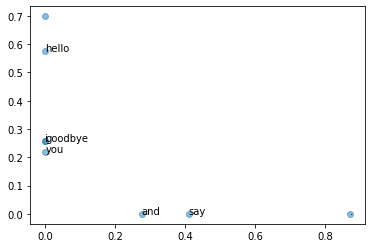

In [29]:
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
    
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()